In [1]:
#red wine SVM
#preparing data by standardScaler

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
# %matplotlib inline
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
grade = [] #add column grade to classify the quality of the wine
for i in red_wine['quality']: 
    if i >= 7:
        i = 1
        grade.append(i)
    else:
        i = 0
        grade.append(i)
red_wine['grade'] = grade

In [4]:
ave_qu = red_wine.groupby("grade").mean()
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
grade,,,,,,,,,,,,
0,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828
1,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


<Axes: xlabel='grade'>

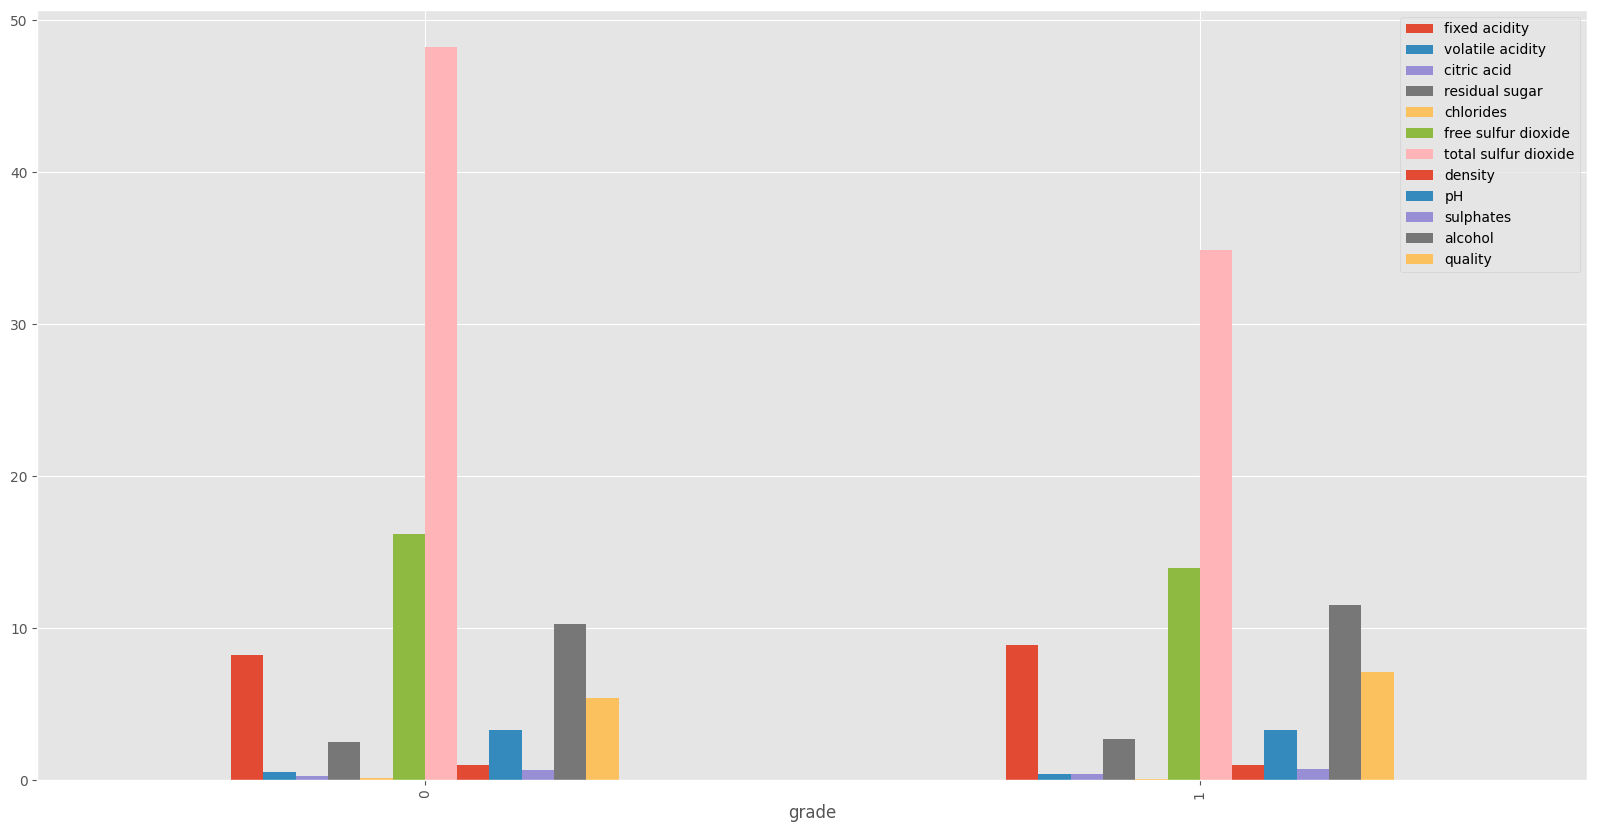

In [5]:
ave_qu.plot(kind="bar",figsize=(20,10))

In [6]:
px.scatter(red_wine, x="free sulfur dioxide", y="total sulfur dioxide",animation_frame="quality")

In [ ]:
# # sns.histplot(data=red_wine, x="quality",hue='quality')
# counts = red_wine['quality'].value_counts()

# # Print the value counts
# print(counts)

In [ ]:
# Plot histograms for all features
# red_wine.hist(figsize=(15, 15))
# plt.tight_layout()
# plt.show()

In [ ]:
# # check correlation among variables
# corr = red_wine.corr()

# # creat heatmap of correlation
# plt.figure(figsize = [20, 10], facecolor = 'white')
# sns.heatmap(corr, annot = True)

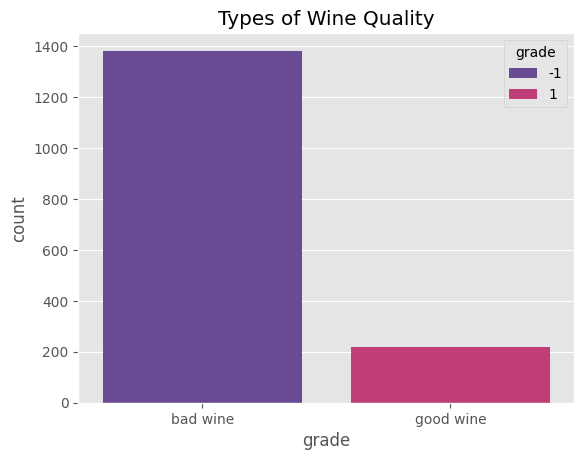

In [44]:
sns.countplot(data = red_wine, x = 'grade', hue = 'grade',palette=['#663f9e',"#d42875"])
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine Quality")
plt.show()

In [ ]:
# wine_data.drop('class', axis=1, inplace=True)

In [ ]:
# red_wine.describe()

In [14]:
#convert data type to numeric
red_wine = red_wine.astype('float64')
red_wine['grade'] = red_wine['grade'].astype('int64')
data_X = pd.DataFrame()

# Add 'free sulfur dioxide' and 'total sulfur dioxide' columns from red wine dataset to data_X
data_X['free sulfur dioxide'] = red_wine['free sulfur dioxide']
data_X['total sulfur dioxide'] = red_wine['total sulfur dioxide']
data_y = red_wine['grade']

print(data_X.shape)
print(data_y.shape)

(1599, 2)
(1599,)


In [ ]:
# wine_data.shape

In [ ]:
# wine_data

In [23]:
def train_test_split(X,y,test_size):
    test_size = 0.2
    train_size = 1 - float(test_size)
    total_rows = red_wine.shape[0]
    split =  int(total_rows * (train_size))
    X_train = data_X[0:split]
    X_test = data_X[split:]
    y_train = data_y[0:split]
    y_test = data_y[split:]
    return X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)

In [25]:
print("X train:",len(X_train))
print("X test:",len(X_test))
print("y train:",len(y_train))
print("y test:",len(y_test))

X train: 1279
X test: 320
y train: 1279
y test: 320


In [26]:
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

In [30]:
data_y_counts = y_test.value_counts()
data_y_counts

grade
-1    295
 1     25
Name: count, dtype: int64

In [31]:
data_y_counts = y_train.value_counts()
data_y_counts

grade
-1    1087
 1     192
Name: count, dtype: int64

In [32]:
# implement Support Vector Machines
import numpy as np

class SVM:
    def __init__(self, learning_rate=10000, lambda_param=0.00001, num_iterations=100):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y[idx]))
                    self.bias -= self.learning_rate * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.sign(approx)
    
    

In [33]:
svm_model = SVM()
svm_model.fit(X_train.to_numpy(), y_train.to_numpy())

In [34]:
svm_y_pred = svm_model.predict(X_test.to_numpy())
accuracy = np.mean(svm_y_pred == y_test)
print('Accuracy Score:', float(accuracy*100),"%")

Accuracy Score: 92.1875 %


In [35]:
# Predict using the trained SVM model
svm_y_pred = svm_model.predict(X_test.to_numpy())

# Map predicted labels back to original labels
svm_y_pred_mapped = np.where(svm_y_pred == 1, "GOOD", "BAD")  # Assuming 1 is mapped to good grade , and -1 is mapped to bad grade

# Print the predicted quality
print("Predicted quality of red wine:")
print(svm_y_pred_mapped)
print(len(svm_y_pred_mapped))

Predicted quality of red wine:
['BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' '

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=svm_y_pred)
cm_wine_data = pd.DataFrame(cm)
cm_wine_data.columns = ['Predict BAD','Predict GOOD']
cm_wine_data = cm_wine_data.rename(index={0: 'Actual BAD',1:'Actual GOOD'})
cm_wine_data

,Predict BAD,Predict GOOD
Actual BAD,295,0
Actual GOOD,25,0


In [40]:
# Future Predictions
new_redwine = red_wine.sample(5)
new_redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
159,6.8,0.60,0.18,1.9,0.079,18.0,86.0,0.99680,3.59,0.57,9.3,6.0,-1
1035,10.1,0.37,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6,7.0,1
852,8.0,0.42,0.32,2.5,0.080,26.0,122.0,0.99801,3.22,1.07,9.7,5.0,-1
799,9.4,0.50,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7,6.0,-1
1430,7.4,0.41,0.24,1.8,0.066,18.0,47.0,0.99560,3.37,0.62,10.4,5.0,-1


In [42]:
new_X = pd.DataFrame()
new_X['free sulfur dioxide'] = new_redwine['free sulfur dioxide']
new_X['total sulfur dioxide'] = new_redwine['total sulfur dioxide']


In [43]:
svm_y_pred_new = svm_model.predict(new_X)
svm_y_pred_mapped = np.where(svm_y_pred_new == 1, "GOOD", "BAD")
print("Predict: ", svm_y_pred_mapped)
new_redwine["quality_str"] = new_redwine["quality"].astype(str)
print("Actual: ",new_redwine["quality_str"].to_numpy())

Predict:  ['BAD' 'BAD' 'BAD' 'BAD' 'BAD']
Actual:  ['6.0' '7.0' '5.0' '6.0' '5.0']
